<a href="https://colab.research.google.com/github/nguyenhson03/Telco-Customer-churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tổng quan về tập dữ liệu**

"Dự đoán hành vi để giữ chân khách hàng. Bạn có thể phân tích tất cả dữ liệu khách hàng có liên quan và phát triển các chương trình giữ chân khách hàng tập trung."

Nguồn: Bộ dữ liệu mẫu của IBM

Tập dữ liệu này cung cấp thông tin chuyên sâu về tỷ lệ rời bỏ khách hàng—giúp doanh nghiệp hiểu lý do khách hàng rời đi và cách cải thiện chiến lược giữ chân khách hàng.


**Thông tin hiển thị**

- Mỗi hàng đại diện cho một khách hàng và mỗi cột mô tả các thuộc tính của khách hàng.

Bộ dữ liệu bao gồm:
1. Trạng thái rời bỏ – Liệu khách hàng có rời đi trong tháng trước hay không
2. Đã đăng ký dịch vụ – Điện thoại, nhiều đường dây, internet, bảo mật trực tuyến, sao lưu, bảo vệ thiết bị, hỗ trợ kỹ thuật và dịch vụ phát trực tuyến
3. Chi tiết tài khoản - Thời hạn, loại hợp đồng, phương thức thanh toán, thanh toán không cần giấy tờ, phí hàng tháng và tổng phí
4. Nhân khẩu học – Giới tính, độ tuổi, sự hiện diện của đối tác và người phụ thuộc



**Ý tưởng**

* Có thể thu được những hiểu biết gì từ các hành vi khác nhau của khách hàng?
* Chúng tôi có thể dự đoán tỷ lệ rời bỏ dựa trên các tính năng như vị trí, giá cả và đánh giá không?
* Chúng tôi có thể dự đoán tỷ lệ rời bỏ dựa trên các tính năng như vị trí, giá cả và đánh giá không?
* Có sự khác biệt đáng chú ý về tỷ lệ giữ chân khách hàng giữa các khu vực không?


**Mô tả các cột**

| Cột dữ liệu  | Ý nghĩa |
|---------|------------|
|1.   customerID: |Mã định danh khách hàng duy nhất .|
|2.   gender: |Giới tính của khách hàng .|
|3.   SeniorCitizen: |Là cho biết tình trạng công dân cấp cao .|
|4.   Partner: |Cho biết khách hàng có đối tác hay không .|
|5.   Dependents: |Cho biết khách hàng có người phụ thuộc hay không .|
|6.   tenure: |Số tháng gắn bó với công ty .|
|7.   PhoneService: |Cho biết dịch vụ điện thoại .|
|8.   MultipleLines: |Cho biết nhiều dòng.|
|9.   InternetService: |Loại dịch vụ internet .|
|10.  OnlineSecurity: |Dịch vụ bảo mật trực tuyến .|
|11.  OnlineBackup: |Dịch vụ sao lưu trực tuyến .|
|12.  DeviceProtection: |Dịch vụ bảo vệ thiết bị .|
|13.  TechSupport: |Dịch vụ hỗ trợ kỹ thuật .|
|14.  StreamingTV: |Dịch vụ truyền hình trực tuyến .|
|15.  StreamingMovies: |Dịch vụ streaming phim .|
|16.  Contract: |Loại hợp đồng .|
|17.  PaperlessBilling: |Thanh toán không cần giấy tờ .|
|18.  PaymentMethod: |Thanh toán không cần giấy tờ .|
|19.  MonthlyCharges: |Phí hàng tháng .|
|20.  TotalCharges: |Tổng phí .|
|21.  Churn: |Cho biết liệu khách hàng có rời bỏ hay không .|


**Nhập thư viện**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Xóa cảnh báo
import warnings
warnings.simplefilter("ignore")
#Hiển thị tất cả các cột và hàng trong đầu ra

In [4]:
# Tải dữ liệu
file_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

In [5]:
# #Hiển thị thông tin cơ bản
print("\nDataset Overview:")
print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#**Phân tích và xử lý dữ liệu**

In [7]:
# xoá cột không cần thiết
df.drop(columns=['customerID'], inplace=True)

In [8]:
#hiển thị số hàng và cột
df.shape

(7043, 20)

In [9]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
# Chuyển đổi 'TotalCharges' thành số (xử lý các giá trị bị thiếu)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [11]:
# chọn cột phù hợp để chuyển đổi sang phân loại
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Chuyển đổi từng cột thành phân loại
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [13]:
# hiển thị bản sao
df.duplicated().sum()

np.int64(22)

In [14]:
# Bỏ những bản sao
nans = df.isna().sum().sort_values(ascending=False)
pct = 100 * nans / df.shape[0]
nan_stats = pd.concat([nans, pct], axis=1)
nan_stats.columns = ['num_of_nans', 'percentage_of_nans']
nan_stats

,num_of_nans,percentage_of_nans
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0
OnlineBackup,0,0.0


In [15]:
#Cột TotalCharges có 11 nans là số nhỏ nên sẽ bỏ cột
df.dropna(subset=['TotalCharges'], inplace=True)

In [16]:
# summary statistics od data
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [17]:
# Thông tin về các biến phân loại
df.describe(include="category")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


#**Trực quan hoá dữ liệu**

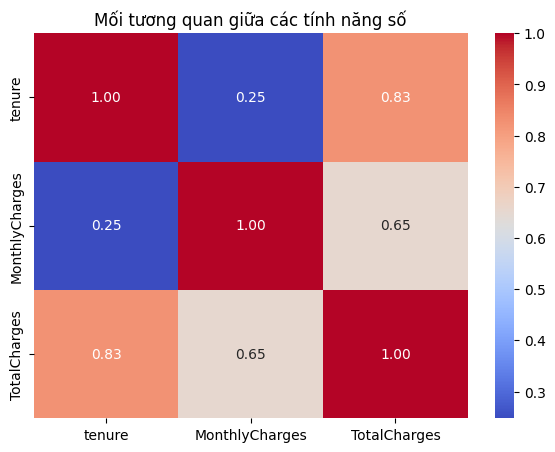

In [18]:
# Sơ đồ nhiệt tương quan (không bao gồm các biến phân loại)
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mối tương quan giữa các tính năng số")
plt.show()

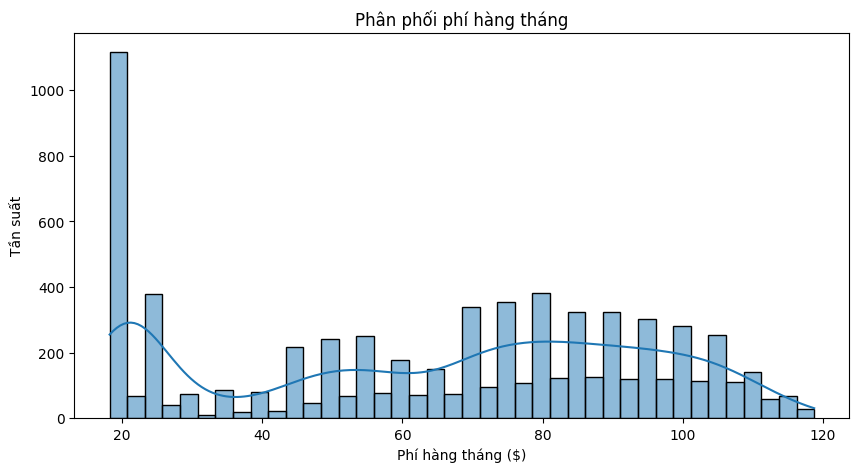

In [19]:
# Phân phối phí hàng tháng
plt.figure(figsize=(10, 5))
sns.histplot(df['MonthlyCharges'], bins=40, kde=True)
plt.title("Phân phối phí hàng tháng")
plt.xlabel("Phí hàng tháng ($)")
plt.ylabel("Tần suất")
plt.show()

In [20]:
# Xác định màu tùy chỉnh
light_blue_color = '#ADD8E6'
light_pink_color = '#FFB6C1'
light_green_color = '#BDFCC9'
light_purple_color = '#DAC4F7'
# Tạo bảng màu cho biểu đồ hình tròn
palette = [light_blue_color, light_pink_color, light_green_color, light_purple_color]

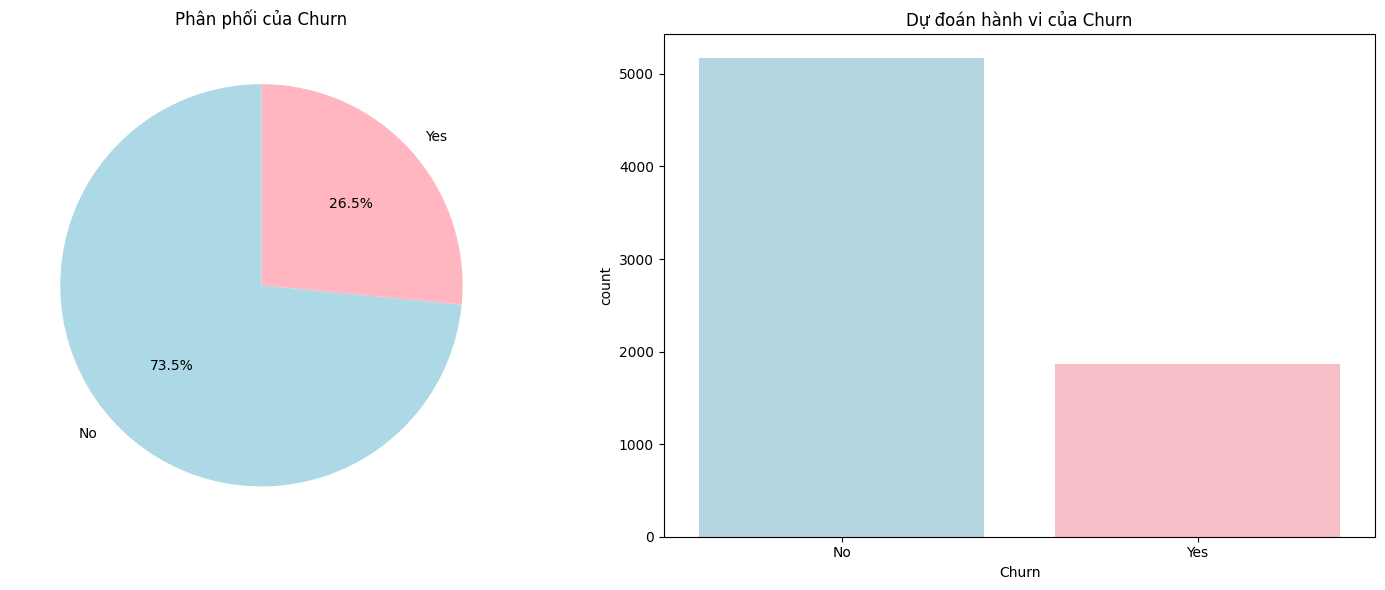

In [21]:
# Phân phối của Churn
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
status_counts = df['Churn'].value_counts()
axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=[light_blue_color, light_pink_color])
axes[0].set_title('Phân phối của Churn')
sns.countplot(x='Churn', data=df, palette=[light_blue_color, light_pink_color], ax=axes[1])
axes[1].set_title('Dự đoán hành vi của Churn')

plt.tight_layout()
plt.show()

Dựa trên hình ảnh phân bổ rời bỏ, chúng ta nhận thấy rằng tỷ lệ khách hàng rời bỏ là khoảng 26,5%, trong khi tỷ lệ khách hàng không rời bỏ là khoảng 73,5%.

In [22]:
# chia các cột phân loại trong danh sách để dễ dàng vẽ biểu đồ
customer_info = ["gender", "SeniorCitizen", "Partner", "Dependents"]
services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
            "StreamingMovies"]
billing_info = ["Contract", "PaperlessBilling", "PaymentMethod"]

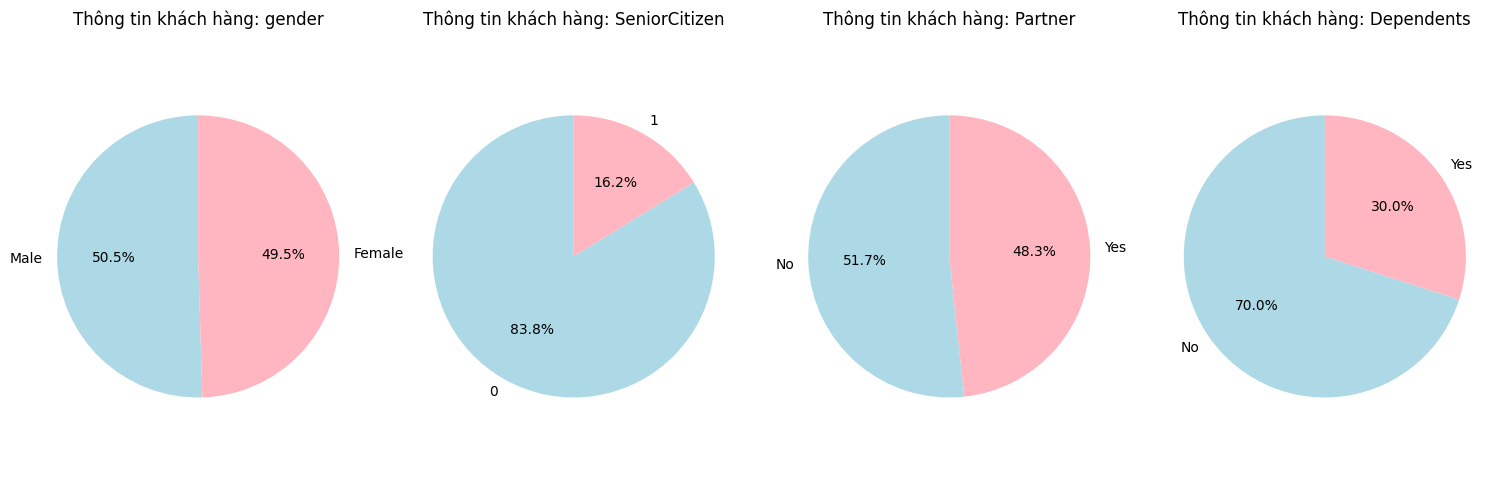

In [23]:
# Vẽ cột thông tin khách hàng
plt.figure(figsize=(15, 5))
for i, col in enumerate(customer_info, 1):
    plt.subplot(1, 4, i)
    counts = df[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
    plt.title(f'Thông tin khách hàng: {col}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

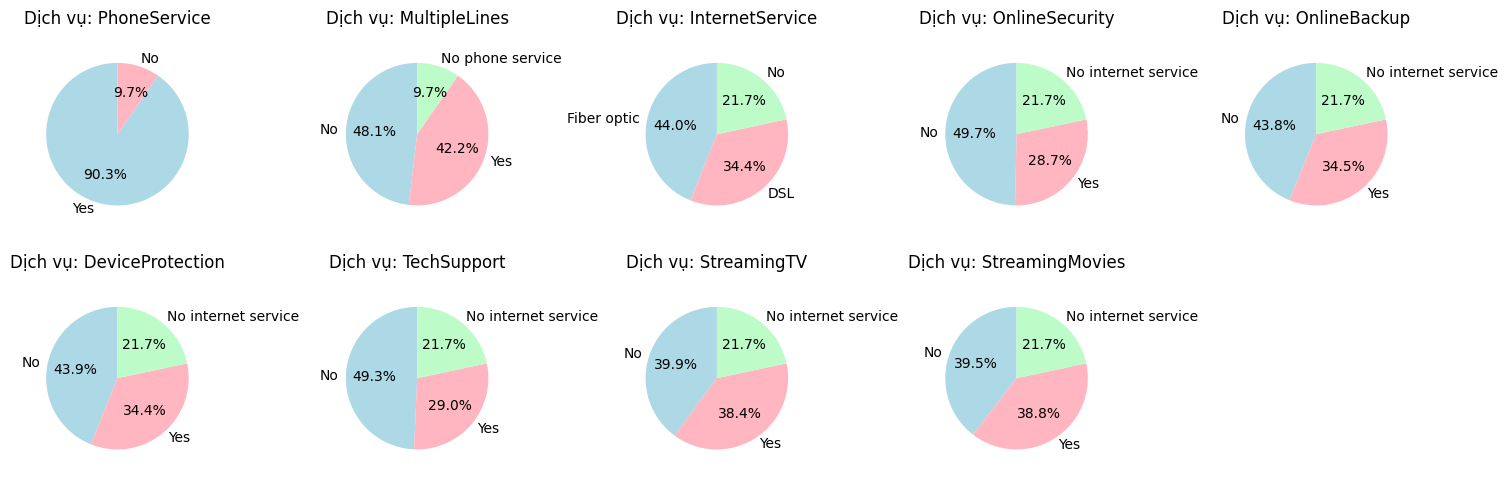

In [24]:
# Vẽ cột dịch vụ
plt.figure(figsize=(15, 5))
for i, col in enumerate(services, 1):
    plt.subplot(2, 5, i)
    counts = df[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
    plt.title(f'Dịch vụ: {col}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

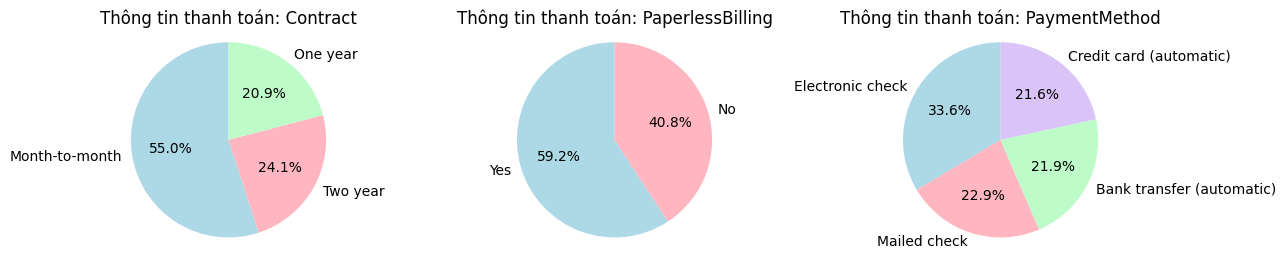

In [25]:
# Vẽ cột thông tin thanh toán
plt.figure(figsize=(15, 5))
for i, col in enumerate(billing_info, 1):
    plt.subplot(2, 4, i)
    if col in ['MonthlyCharges', 'TotalCharges', 'tenure']:
        sns.histplot(df[col], kde=True, color=light_blue_color)
        plt.title(f'Billing Info: {col}')
    else:
        counts = df[col].value_counts(normalize=True)
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
        plt.title(f'Thông tin thanh toán: {col}')
        plt.axis('equal')
plt.tight_layout()
plt.show()

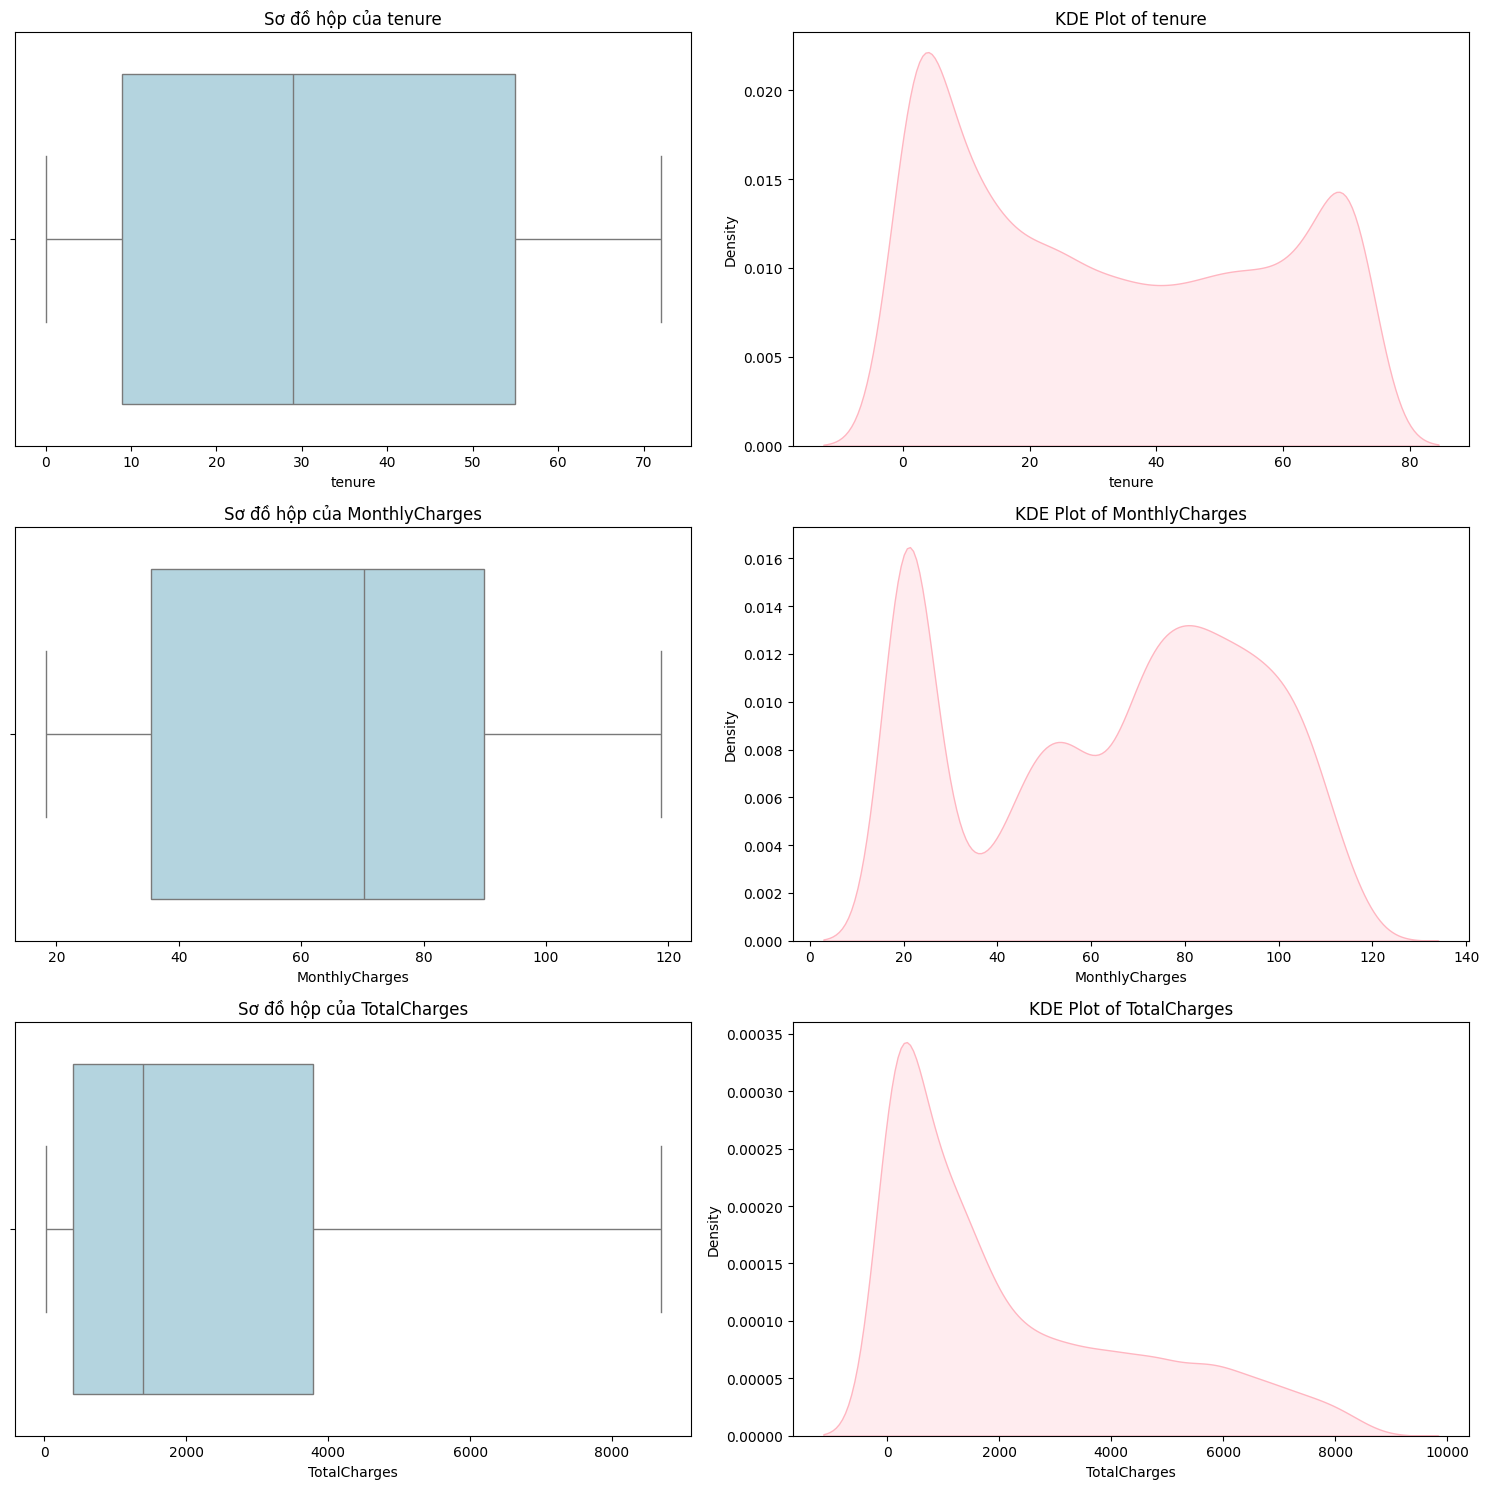

In [26]:
# Xác định cột số
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

num_rows = len(numeric_cols)
num_cols = 2

# Tạo ô phụ
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)
for i, column in enumerate(numeric_cols):
    # Sơ đồ hộp
    sns.boxplot(x=df[column], ax=axes[i, 0], color=light_blue_color)
    axes[i, 0].set_title(f'Sơ đồ hộp của {column}')
    axes[i, 0].set_xlabel(column)
    # KDE plot
    sns.kdeplot(data=df[column], ax=axes[i, 1], color=light_pink_color, fill=True)
    axes[i, 1].set_title(f'KDE Plot of {column}')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

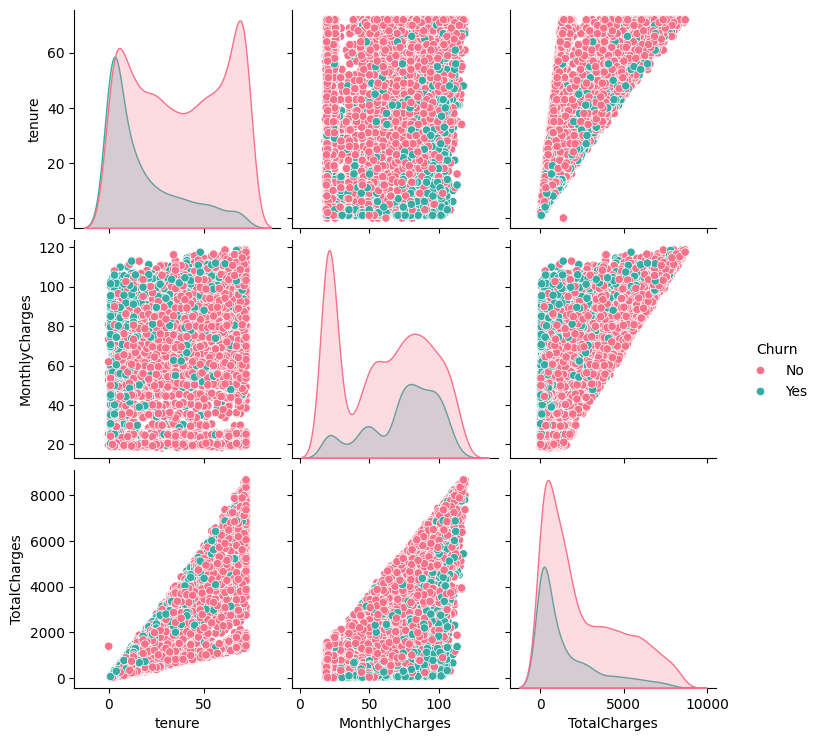

In [27]:
sns.pairplot(df, hue='Churn', palette='husl')

plt.show()

#**Học máy: Dự đoán tỷ lệ rời bỏ khách hàng**

In [28]:
# Nhập thư viện Học Máy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Chọn các cột dữ liệu liên quan
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod', 'InternetService']
target = 'Churn'

df = df.dropna(subset=[target])  # Xóa các giá trị còn thiếu trong biến mục tiêu
X = df[features]
y = df[target].map({'Yes': 1, 'No': 0})  # Chuyển đổi Churn sang nhị phân (1 là Có, 0 là Không)

# Xử lý dữ liệu phân loại
categorical_features = ['Contract', 'PaymentMethod', 'InternetService']
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Quy trình tiền xử lý
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Tổ máy biến áp
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Tách dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Đào tạo mẫu
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

#Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.59      0.50      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



**Kết luận**

Mô hình phân loại đúng 78% số mẫu trên toàn bộ tập kiểm tra (test set).

*Precision (Độ chính xác):*

Lớp 0: 83% các mẫu được mô hình dự đoán là lớp 0 thực sự đúng.

Lớp 1: 59% các mẫu dự đoán là lớp 1 thực sự đúng.

➡ Mô hình dự đoán lớp 1 kém tin cậy hơn lớp 0.

*Recall (Độ bao phủ):*

Lớp 0: Mô hình phát hiện 88% số mẫu thực sự là lớp 0.

Lớp 1: Chỉ phát hiện được 50% số mẫu thực sự là lớp 1.

➡ Mô hình bỏ sót khá nhiều trường hợp của lớp 1.

*F1-score (Trung bình hài hòa của precision và recall):*

Lớp 0: 0.85 – tốt

Lớp 1: 0.54 – yếu

➡ Cho thấy mô hình hoạt động tốt với lớp 0 nhưng hiệu suất với lớp 1 còn kém.

*Support (Số lượng mẫu thực tế mỗi lớp):*

Lớp 0: 1036 mẫu (73.5%)

Lớp 1: 373 mẫu (26.5%)

➡ Dữ liệu mất cân bằng (class imbalance) rõ rệt, dẫn đến mô hình thiên vị lớp 0.

Macro avg: Trung bình đơn giản giữa các lớp, không quan tâm đến kích thước lớp.
➡ Cho thấy sự kém hiệu quả với lớp thiểu số.

Weighted avg: Trung bình có trọng số theo support.
➡ Vì lớp 0 chiếm đa số, nên chỉ số này gần với hiệu suất của lớp 0.

#**MODELING**

In [29]:
# Nhập thư viện
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

In [30]:
# Xác định các phân loại/mô hình
classifiers = [
    ('logreg', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier()),
    ('gbc', GradientBoostingClassifier())
]

In [31]:
# Lựa chọn tính năng và phân loại biểu quyết
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

In [32]:
# Xác định thuộc tính (X) và biến mục tiêu (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

In [43]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
# # Quy trình tiền xử lý với SMOTE
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE()),
    ('voting_clf', voting_clf)
])

In [45]:
param_grid = {
    'voting_clf__logreg__C': [0.1, 1.0, 10],
    'voting_clf__rf__n_estimators': [50, 100, 200],
    'voting_clf__gbc__learning_rate': [0.01, 0.1, 0.2]
}

In [36]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Contract',
                                                                          'PaymentMethod',
                                                                          'InternetService'])])),
                                       ('smote', SMOTE()),
                                       ('voting_clf',
                                        VotingClassifier(estimators=[('logreg',
                                                                      LogisticRegression(max_iter=1000)),
                                                                     ('rf',
                                                                      RandomForestClassifier()),
                                                                     ('gbc',
                                                                      GradientBoostingClassifier())],
                                                         voting='soft'))]),
             param_grid={'voting_clf__gbc__learning_rate': [0.01, 0.1, 0.2],
                         'voting_clf__logreg__C': [0.1, 1.0, 10],
                         'voting_clf__rf__n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [46]:
# Thông số và ước tính tốt nhất
print("Thông số tốt nhất được tìm thấy: ", grid_search.best_params_)
best_estimator = grid_search.best_estimator_

Thông số tốt nhất được tìm thấy:  {'voting_clf__gbc__learning_rate': 0.1, 'voting_clf__logreg__C': 1.0, 'voting_clf__rf__n_estimators': 50}


In [47]:
# Dự đoán
y_pred = best_estimator.predict(X_test)

In [49]:
# Đánh giá
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

print("Unique y_test:", np.unique(y_test, return_counts=True))
print("Unique y_pred:", np.unique(y_pred, return_counts=True))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Unique y_test: (array(['No', 'Yes'], dtype=object), array([1035,  374]))
Unique y_pred: (array(['No', 'Yes'], dtype=object), array([911, 498]))
Accuracy: 0.84


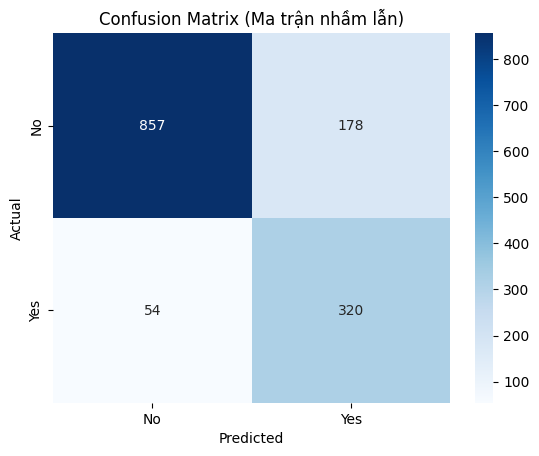

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Ma trận nhầm lẫn)')
plt.show()

In [51]:
#Kết quả đánh giá
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.94      0.83      0.88      1035
         Yes       0.64      0.86      0.73       374

    accuracy                           0.84      1409
   macro avg       0.79      0.84      0.81      1409
weighted avg       0.86      0.84      0.84      1409



**Kết luận**

Mô hình phân loại đúng 78% số mẫu trên toàn bộ tập kiểm tra (test set).

*Precision (Độ chính xác):*

Lớp 0: 94% các mẫu được mô hình dự đoán là lớp 0 thực sự đúng.

Lớp 1: 64% các mẫu dự đoán là lớp 1 thực sự đúng.

➡ Mô hình dự đoán lớp 1 kém tin cậy hơn lớp 0.

*Recall (Độ bao phủ):*

Lớp 0: Mô hình phát hiện 83% số mẫu thực sự là lớp 0.

Lớp 1: Chỉ phát hiện được 86% số mẫu thực sự là lớp 1.

➡ Mô hình bỏ sót khá nhiều trường hợp của lớp 1.

*F1-score (Trung bình hài hòa của precision và recall):*

Lớp 0: 0.88 – tốt

Lớp 1: 0.73 – yếu

➡ Cho thấy mô hình hoạt động tốt với lớp 0 nhưng hiệu suất với lớp 1 còn kém.

*Support (Số lượng mẫu thực tế mỗi lớp):*

Lớp 0: 1035 mẫu (73.4%)

Lớp 1: 374 mẫu (26.6%)

➡ Dữ liệu mất cân bằng (class imbalance) rõ rệt, dẫn đến mô hình thiên vị lớp 0.

Macro avg: Trung bình đơn giản giữa các lớp, không quan tâm đến kích thước lớp.
➡ Cho thấy sự kém hiệu quả với lớp thiểu số.

Weighted avg: Trung bình có trọng số theo support.
➡ Vì lớp 0 chiếm đa số, nên chỉ số này gần với hiệu suất của lớp 0.